<a href="https://colab.research.google.com/github/AnkitKUpadhyay/Projects/blob/master/MNIST_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 1.2 MB 32.2 MB/s 
     |████████████████████████████████| 189 kB 49.8 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 51 kB 339 kB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.MNIST)

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
path.ls()


(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [ ]:
digi_classifier = DataBlock(
 blocks=(ImageBlock, CategoryBlock),
 get_items=get_image_files,  #get_image_files function takes a path, and returns a list of all of the images in that path (recursively, by default)
 splitter=RandomSplitter(valid_pct=0.2, seed=42),
 get_y=parent_label, #telling fastai what function to call to create the labels in our dataset
 item_tfms=Resize(128))

In [ ]:
dls = digi_classifier.dataloaders(path)

In [ ]:
dls = ImageDataLoaders.from_folder(path=path, 
                                   train='training', 
                                   valid='testing', 
                                   shuffle=True)

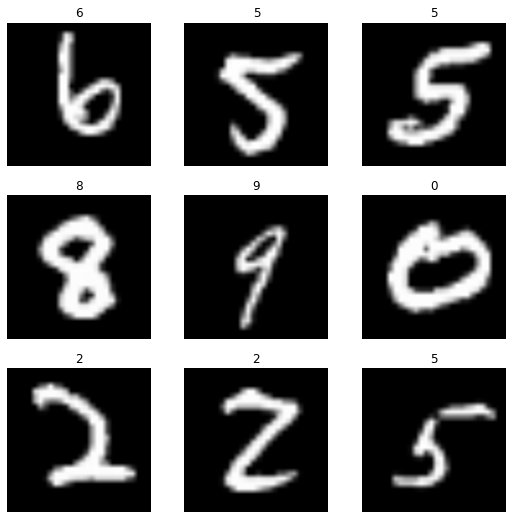

In [ ]:
dls.train.show_batch()


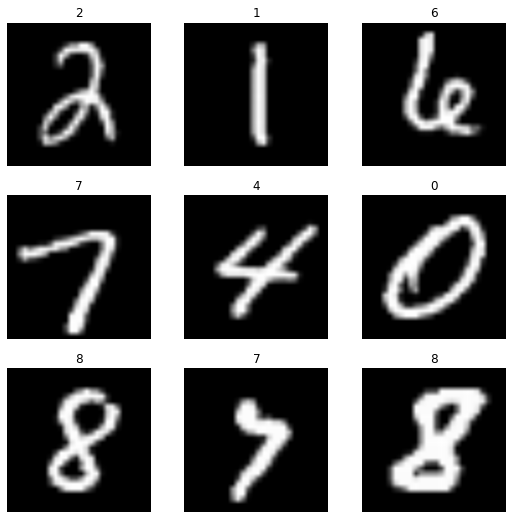

In [ ]:
dls.valid.show_batch()

In [ ]:
learn = cnn_learner(dls, 
                    resnet18, 
                    metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.201233,0.117071,0.964214,0.035786,03:42


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.075745,0.037733,0.988714,0.011286,04:50
1,0.032060,0.035041,0.990357,0.009643,04:51
2,0.013028,0.022672,0.994000,0.006000,04:50
3,0.002715,0.020420,0.995071,0.004929,04:51


In [ ]:
images = get_image_files(path/'testing')

In [ ]:
# select an image and display
img = PILImage.create(images[4432])
img

In [ ]:
lbl, _ , _ = learn.predict(img)
lbl

'2'

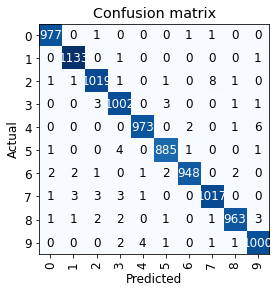

In [ ]:
interep = ClassificationInterpretation.from_learner(learn)
interep.plot_confusion_matrix()